# Predicting the Risk of Employee's Attrition

By: Evelyn Peh Ting Yu, Koh Pei Ling, Song Yu Xiang, Wong Jie Peng, Guo Peng Yuan

"It could cost up to 11k in direct training expenses and lost productivity to replace an experienced employee earning an annual salary of 33k." - US Department of Labour

This project aims to predict the likelihood of an employee attrition by understanding the main drivers of employee churn. The executive chairman of linkedin, Jeff Weiner, once said "Start the retention process when the person is still open to staying and not after they’ve already told you that they are leaving"

By predicting the risk of an employee attrition allow management to take possible actions start retention process early, when the employee has not made up their mind to leave yet. This would ultimately reduce the high cost incurred in recruiting, hiring, training new employee etc and as well as turnover. If turnover is low, companies would not need to set aside time to continually find new employees; instead, they’ll be able to fully focus on core business and benefit from having tenured employees who are familiar with the company processes and culture.

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.preprocessing import StandardScaler, LabelEncoder 

#model
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier # pip install xgboost

from sklearn.feature_selection import SelectFromModel

from imblearn.over_sampling import SMOTE # !pip install imblearn

### 2. Import Dataset

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

<b>35 attributes, 1460 observations</b> <br><br>
<b>Attributes:</b> <br>
<b>Dependent Variables:</b> Attrition <br>
<b>Independent Variables:</b>
<ul>
    <li><b><i>Basic Information (6 attributes)</i></b>: Age, Education, Education Field, Gender, Marital Status, Distance From Home
    <li><b><i>Work Information (8 attributes)</i></b>: Department, Job Role, Job Level, Over Time, Business Travel, Performance Rating, Stock Option Level,
          Job Involvement
    <li><b><i>Satisfaction (4 attributes)</i></b>: Work-Life Balance, Job Satisfaction, Relationship Satisfaction, Enviroment Satisfaction
    <li><b><i>Salary Related (5 attributes)</i></b>: Monthly Income, Monthly Rate, Daily Rate, Hourly Rate, Percent Salary Hike
    <li><b><i>Time Related (7 attributes)</i></b>: Total Working Years, Training Time Last Year, Years At Company, Years In Current Role, Years Since Last Promotion, 
           Years With Current Manager, Num Companies Worked
</ul>

In [2]:
df = pd.read_csv("dataset.csv") 
df.shape #1470 rows and 35 columns

(1470, 35)

In [3]:
df.head() #top 5 records, ensure data loaded properly

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 4. Exploratory Data Analysis

##### Check for Null Values

> no null value

In [4]:
df.isnull().sum() #no null value

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Check for Duplicates
> no duplicated records

In [5]:
df.duplicated().sum()

0

##### List of Attributes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### Summary Statistic

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##### check if any column has only  1 unique value
>can consider dropping columns with only 1 unique value 

In [8]:
df.loc[:, df.nunique() == 1].columns

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

In [9]:
col_to_drop = df.loc[:, df.nunique() == 1].columns

##### Check if any column has all unique value which is likely to be a identifier variable

In [10]:
df.loc[:, df.nunique() == df.shape[0]].columns

Index(['EmployeeNumber'], dtype='object')

In [11]:
col_to_drop = col_to_drop.append(df.loc[:, df.nunique() == df.shape[0]].columns)

##### Distribution of each column 

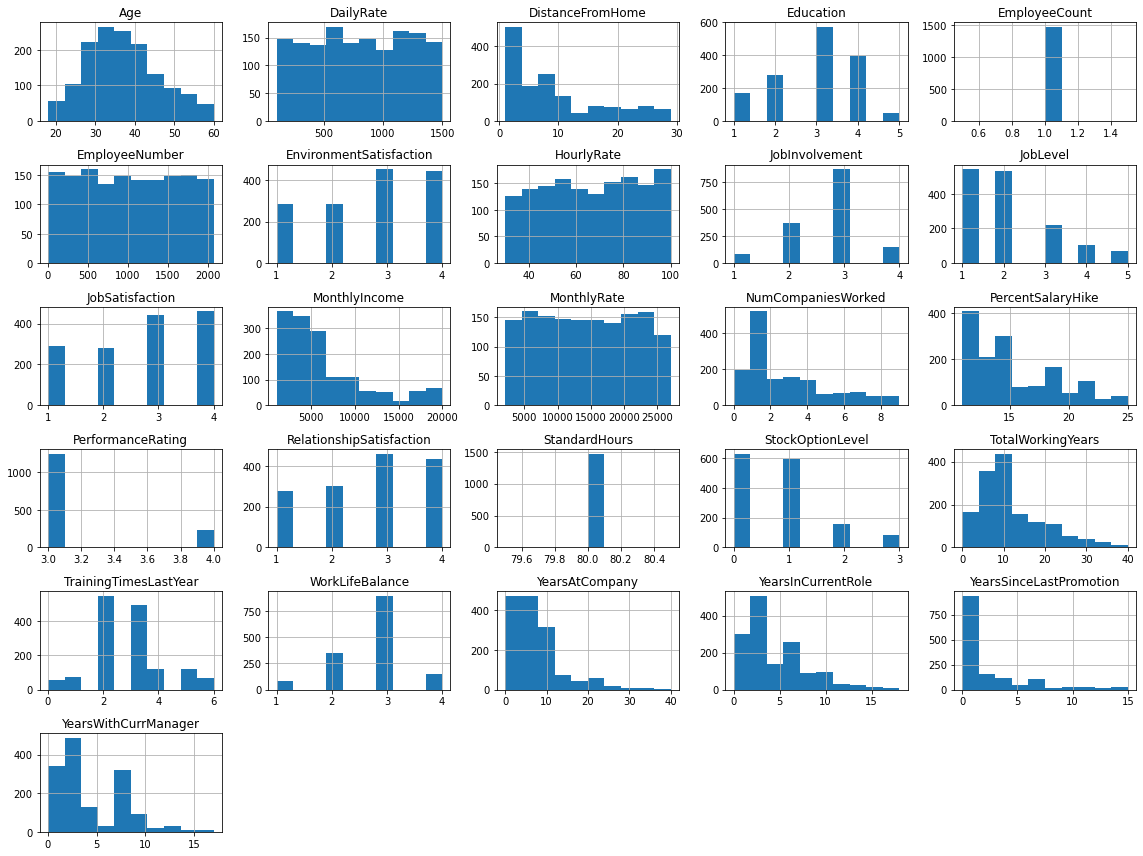

In [12]:
df.hist(figsize=(16,12))
plt.tight_layout()

###### Correlation

> <li>'TotalWorkingYears' is strongly correlated with 'JobLevel' and 'MonthlyIncome'.</li><li>'Performance Rating' is strongly correlated with 'PercentSalaryHike'</li> <li> In general, we can see quite a lot of variables are poorly correlated. It is desirable to train a predictive model with features that are not highly correlated with each other.</li>



<AxesSubplot:>

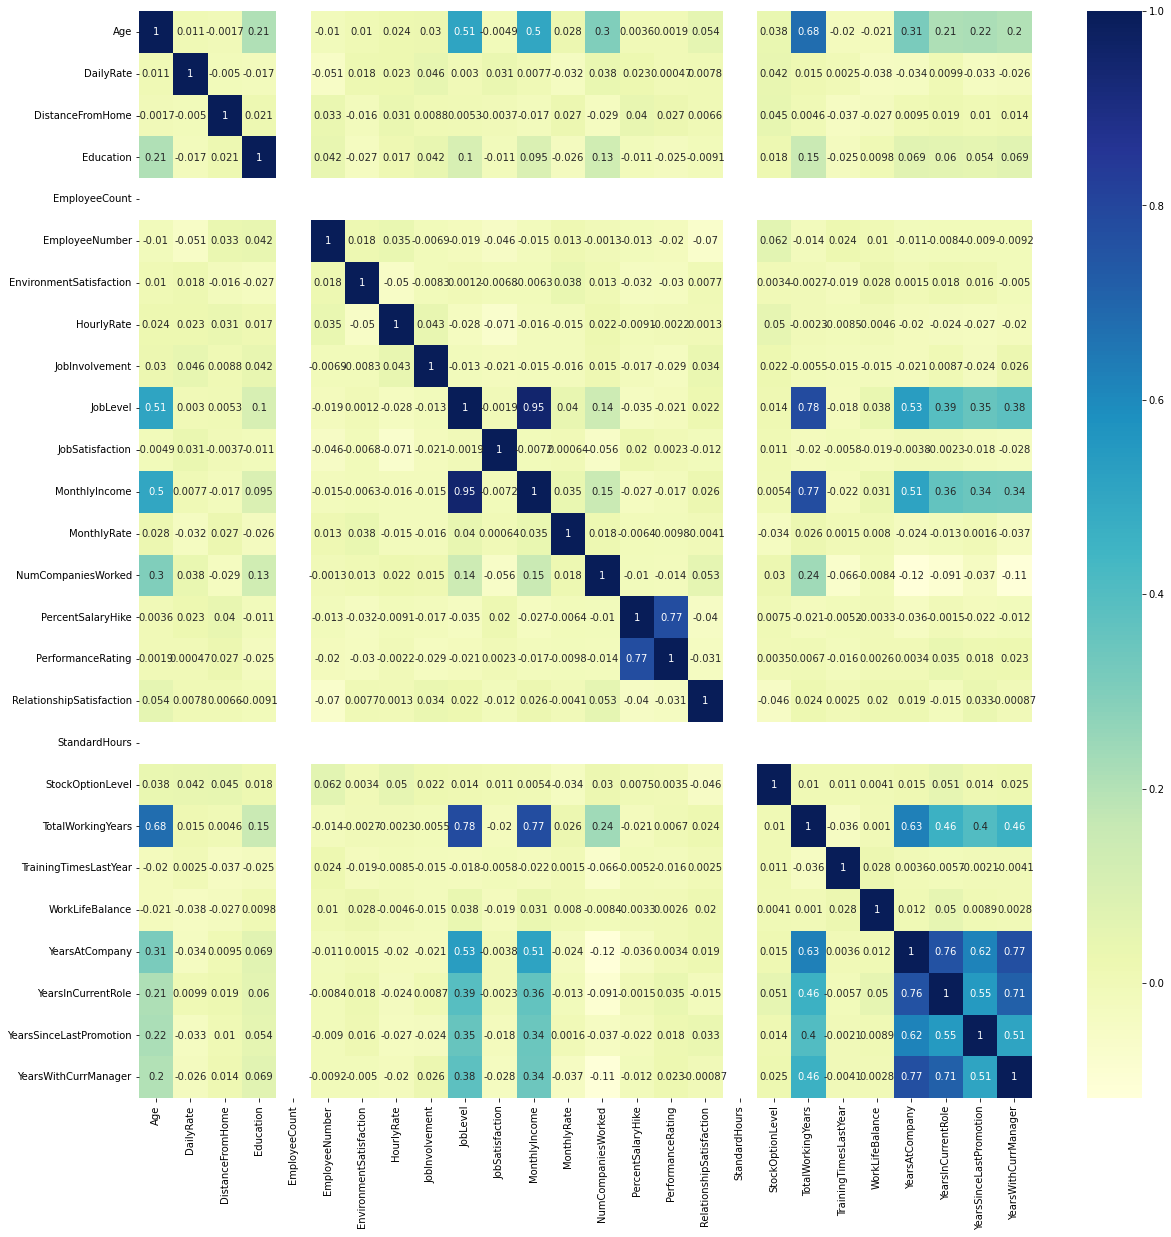

In [13]:
# let's see the correlation between the features
plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

#### Target Variable - Attrition
> only 237 out of 1470 total employee in our dataset left the company. This show that our databset is imbalance and this could raise an issue as model may be  biased towards employees who opt to stay at the company. Hence, there is a need to balance out data when before building the model 

0    1233
1     237
Name: Attrition, dtype: int64


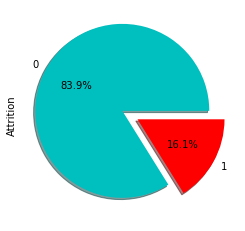

In [14]:
# 0 - 'No' | 1 - 'Yes'
dict_map = {"No": 0, "Yes": 1}
df.Attrition = df['Attrition'].map(dict_map)  
df['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(df['Attrition'].value_counts())

#### Gender vs Attrition


> <li>The ratio between numbers of males and females in the company are 1.5.</li><li>The number of males which likely to leave the firm more than number of female.</li>

Male      882
Female    588
Name: Gender, dtype: int64


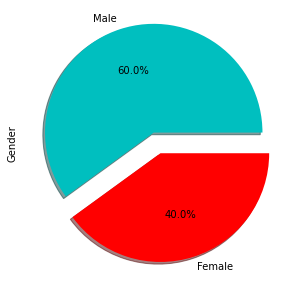

In [15]:
plt.figure(figsize=(10,5))
total = float(len(df))
#% of Gender
df['Gender'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(df['Gender'].value_counts())
plt.show()


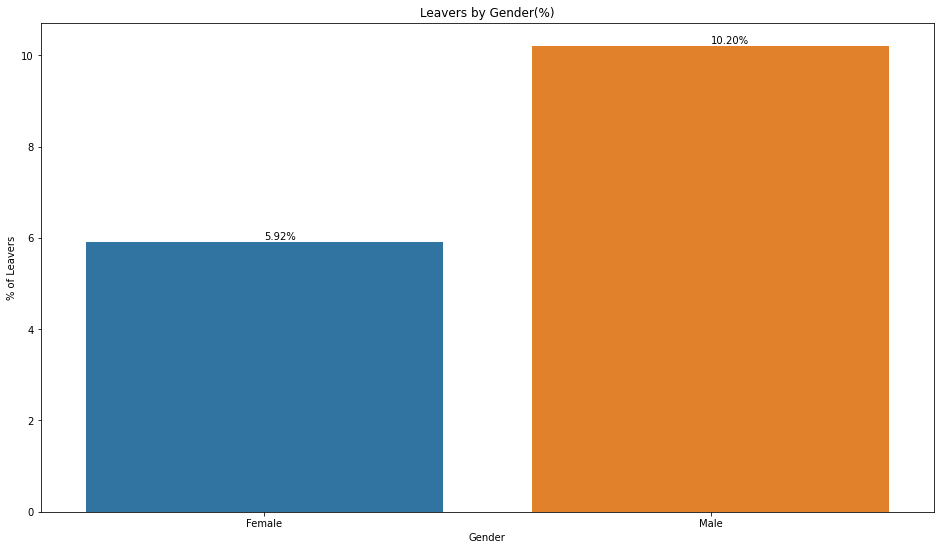

In [16]:
df_gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0
for sex in list(df['Gender'].unique()):
    ratio = df[(df['Gender']==sex)&(df['Attrition']==1)].shape[0] / df['Gender'].shape[0]
    df_gender.loc[i] = [sex, ratio*100]
    i += 1
df_gender.sort_values(by="% of Leavers", ascending=True, inplace=True)

plt.figure(figsize=(16,9))
ax = sns.barplot(x="Gender", y="% of Leavers", data=df_gender)
for i, v in enumerate(df_gender["% of Leavers"].iteritems()):  
    ax.text(i,v[1], "{:,.2f}%".format(v[1]), va ='bottom', rotation=0)
plt.title("Leavers by Gender(%)")
plt.show()

##### Age vs Attrition

> <ul><li>The majority of employee are between 28 - 36 years old, while the range of age are 18 - 60</li><li>The Company seems to be highly depended on segment of employees younger than 40 years old</li><li>A close pattern can be identified where the attrition is maximum between the age groups 28-32. The attrition rate keeps on falling with increasing age. This could because people starts looking for  stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more and this could be because they are still young and exploring job</li></ul>

Text(0.5, 1.0, 'Age Distribution by Attrition')

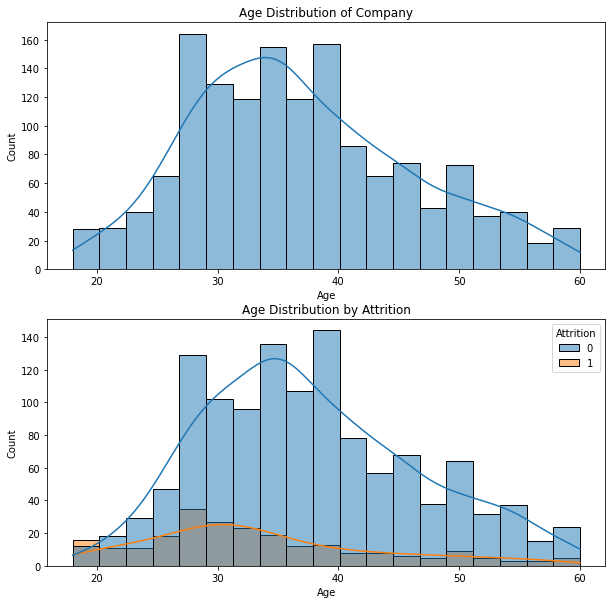

In [17]:
plt.figure(figsize = (10, 10))
plt.subplot(2,1,1)
sns.histplot(x = 'Age', data = df, kde=True )
plt.title("Age Distribution of Company")
plt.subplot(2,1,2)
sns.histplot(x = 'Age', hue = 'Attrition', data = df, kde=True )
plt.title("Age Distribution by Attrition")

##### Distance from Home vs Attrition

> <li>Most of the employees have a distance from home in range(1-10 km)</li><li>More employees tend to leave when the distance from home is more than 10 km</li>

Text(0.5, 1.0, 'Distance From Home')

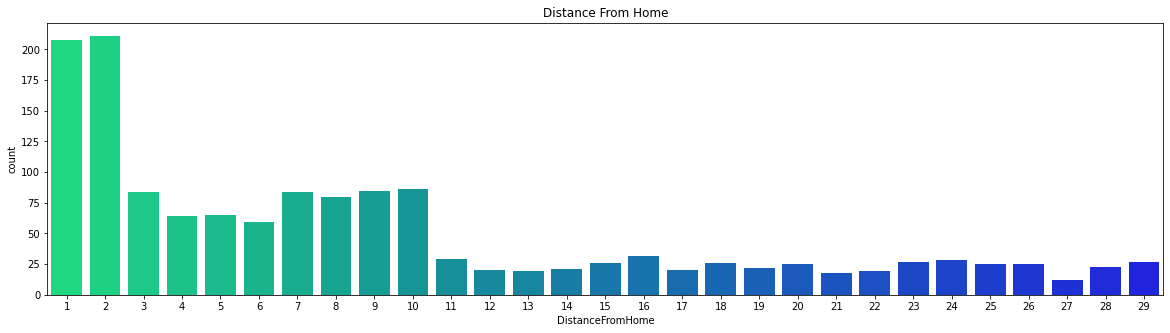

In [18]:
plt.figure(figsize = (20,5))
#plt.subplot(2,1,1)
sns.countplot(x= 'DistanceFromHome' ,data = df ,palette='winter_r')
plt.title('Distance From Home')
#plt.subplot(2,1,2)
#plt.title('Distance From Home by Attrition')
#sns.countplot(x= 'DistanceFromHome' ,data = df ,palette='winter_r'  ,hue = df['Attrition'])

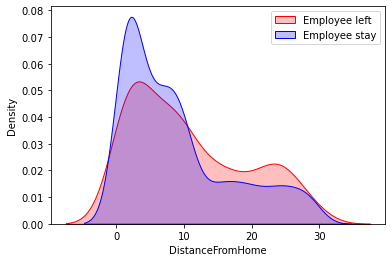

In [19]:
df_left=df[df['Attrition']==1]['DistanceFromHome'] 
df_stay=df[df['Attrition']==0]['DistanceFromHome'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'r' )
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'b')
plt.legend()
plt.show()

##### Education vs Attrition
1 - 'Below College' <br>
2 -'College' <br>
3 - 'Bachelor' <br>
4 - 'Master' <br>
5 - 'Doctor' 

> the employee of Bachelor degree tends to leave company than the people have any other degrees.

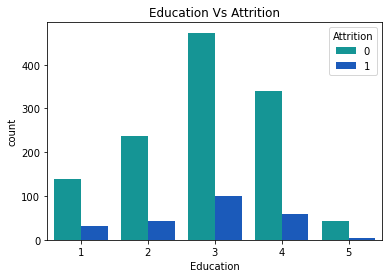

In [20]:
#df['Education'] = df['Education'].replace([1,2,3,4,5],['Below College','College', 'Bachelor', 'Master', 'Doctor'])
sns.countplot(x = 'Education', data = df, palette = 'winter_r', hue = 'Attrition')
plt.title('Education Vs Attrition')
plt.show()

###### Education Field

>Employees studied in the education field of Life Sciences had the highest count of attrition, followed by Medical and Marketing.

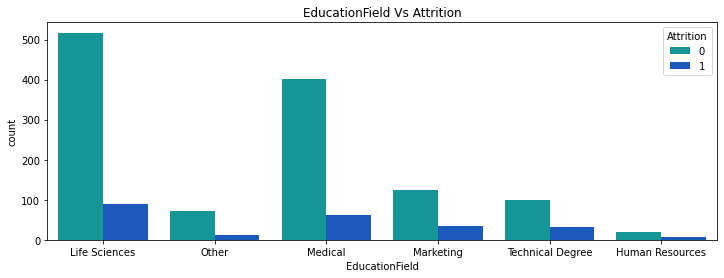

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x = 'EducationField', data = df, palette = 'winter_r', hue = 'Attrition')
plt.title('EducationField Vs Attrition')
plt.show()

###### Maritial Status
>Single employee form the largest proportion of attrition, while the others who are married tend to be stable.

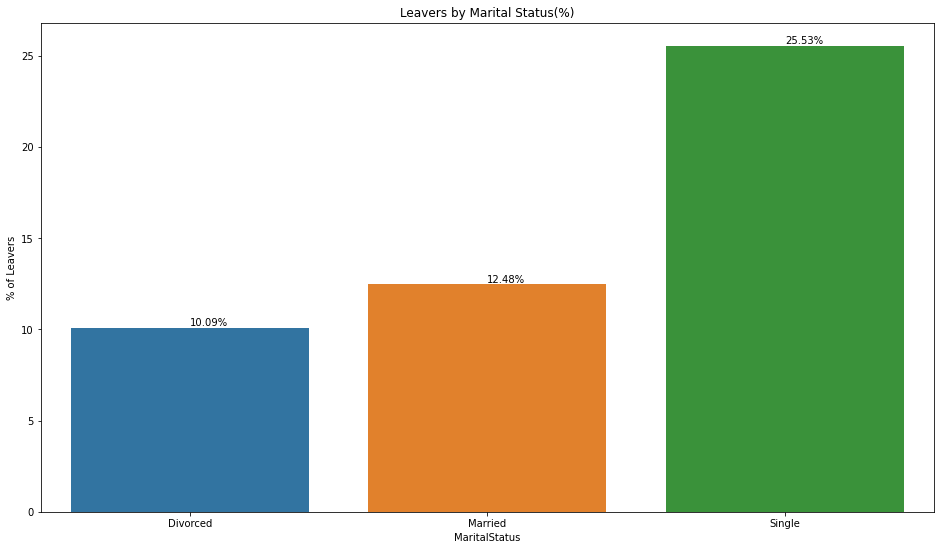

In [22]:
df_MaritalStatus = pd.DataFrame(columns=["MaritalStatus", "% of Leavers"])
i=0
for status in list(df['MaritalStatus'].unique()):
    ratio = df[(df['MaritalStatus']==status)&(df['Attrition']==1)].shape[0] / df[df['MaritalStatus']==status].shape[0]
    df_MaritalStatus.loc[i] = [status, ratio*100]
    i += 1
df_MaritalStatus.sort_values(by="% of Leavers", ascending=True, inplace=True)

plt.figure(figsize=(16,9))
ax = sns.barplot(x="MaritalStatus", y="% of Leavers", data=df_MaritalStatus)
for i, v in enumerate(df_MaritalStatus["% of Leavers"].iteritems()):  
    ax.text(i,v[1], "{:,.2f}%".format(v[1]), va ='bottom', rotation=0)
plt.title("Leavers by Marital Status(%)")
plt.show()

###### Department
>The ratio of Attrition in Sales Dept. is 20% which is the highest among other departments.


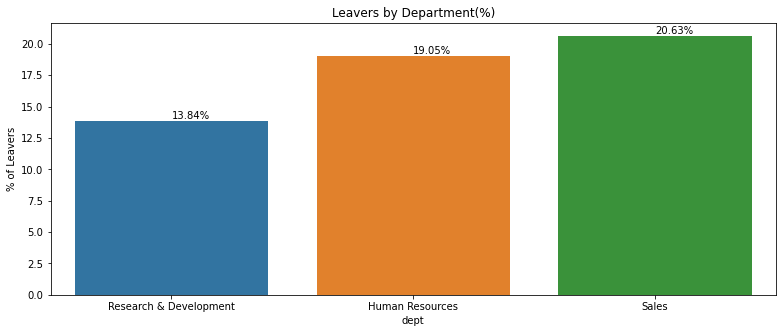

In [23]:
df_dept = pd.DataFrame(columns=["dept", "% of Leavers"])
i=0
for d in list(df['Department'].unique()):
    ratio = df[(df['Department']==d)&(df['Attrition']==1)].shape[0] / df[df['Department']==d].shape[0]
    df_dept.loc[i] = [d, ratio*100]
    i += 1

df_dept.sort_values(by="% of Leavers", ascending=True, inplace=True)

plt.figure(figsize=(13,5))
ax = sns.barplot(x="dept", y="% of Leavers", data=df_dept)
for i, v in enumerate(df_dept["% of Leavers"].iteritems()):  
    ax.text(i,v[1], "{:,.2f}%".format(v[1]), va ='bottom', rotation=0)
plt.title("Leavers by Department(%)")
plt.show()

###### Job Role vs Attrition
> Sales Representative has the highest proportion of Attrition. In the previous exploration of Department attribute, we also see that highest proportion comes from sales department

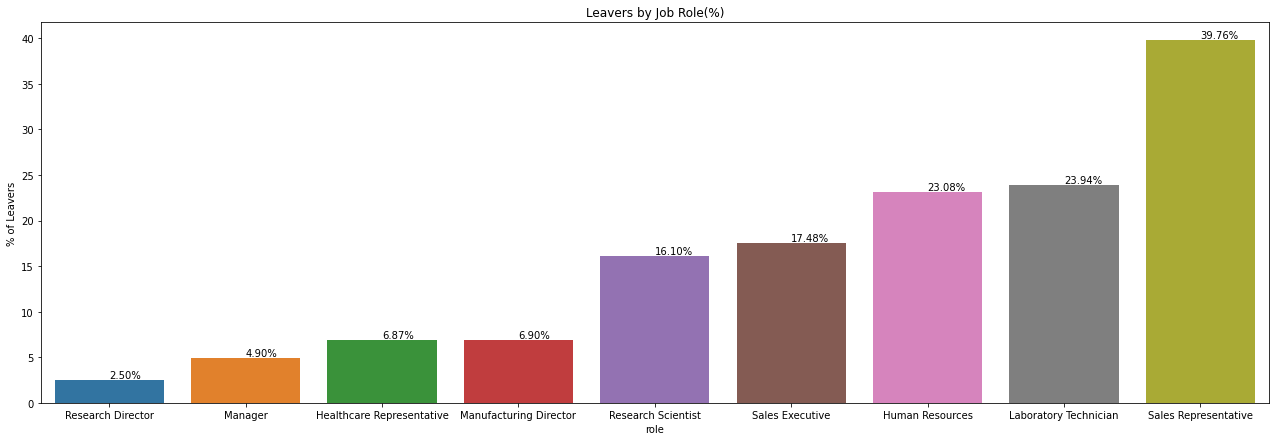

In [24]:
df_role = pd.DataFrame(columns=["role", "% of Leavers"])
i=0
for r in list(df['JobRole'].unique()):
    ratio = df[(df['JobRole']==r)&(df['Attrition']==1)].shape[0] / df[df['JobRole']==r].shape[0]
    df_role.loc[i] = [r, ratio*100]
    i += 1

df_role.sort_values(by="% of Leavers", ascending=True, inplace=True)

plt.figure(figsize=(22,7))
ax = sns.barplot(x="role", y="% of Leavers", data=df_role)
for i, v in enumerate(df_role["% of Leavers"].iteritems()):  
    ax.text(i,v[1], "{:,.2f}%".format(v[1]), va ='bottom', rotation=0)
plt.title("Leavers by Job Role(%)")
plt.show()

> Why Sales Representative has high attrition rate? <li> Sales Representative’ shows a compact distribution, with income broadly lower than other roles</li>

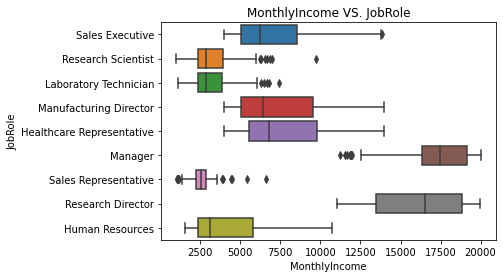

In [25]:
plt.title('MonthlyIncome VS. JobRole')
sns.boxplot(y=df['JobRole'],x=df['MonthlyIncome'])
plt.show()

###### Overtime vs Attrition
><li>The data of Current employee shows that only 23% of them have over time commitment while among the ex-employees, there are more than half (54%) of them that have overtime commitment. </li><li>Significant larger portion of employees with OT that have left the company. Constant overtime commitment may be a strong factor for employee attrition.</li>

In [26]:
round(df.loc[df['Attrition'] == 0, 'OverTime'].value_counts(normalize=True)*100,2)

No     76.56
Yes    23.44
Name: OverTime, dtype: float64

In [27]:
round(df.loc[df['Attrition'] == 1, 'OverTime'].value_counts(normalize=True)*100,2)

Yes    53.59
No     46.41
Name: OverTime, dtype: float64

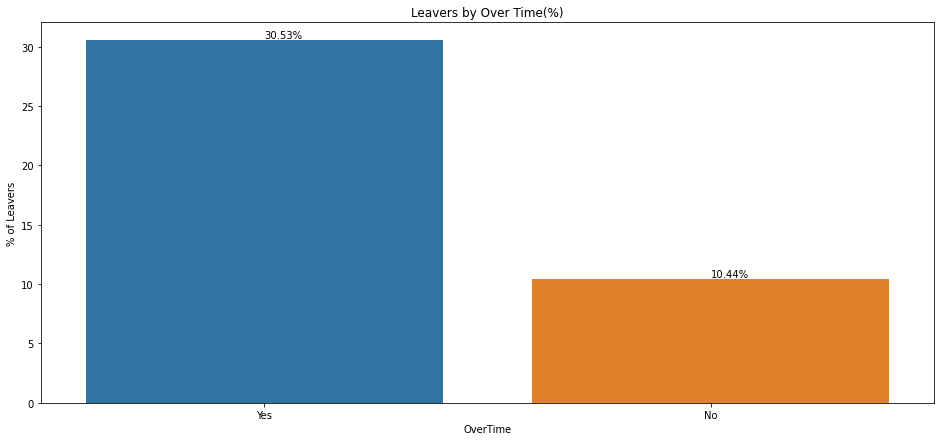

In [28]:
df_ot = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for r in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime']==r)&(df['Attrition']==1)].shape[0] / df[df['OverTime']==r].shape[0]
    df_ot.loc[i] = [r, ratio*100]
    i += 1

df_role.sort_values(by="% of Leavers", ascending=True, inplace=True)

plt.figure(figsize=(16,7))
ax = sns.barplot(x="OverTime", y="% of Leavers", data=df_ot)
for i, v in enumerate(df_ot["% of Leavers"].iteritems()):  
    ax.text(i,v[1], "{:,.2f}%".format(v[1]), va ='bottom', rotation=0)
plt.title("Leavers by Over Time(%)")
plt.show()

###### Business Travel vs Attrition

> <li>Information about how many hours of Travel is considered "Frequent" is not disclosed</li><li>There is a largest normalized proportion of Leavers for employees that travel "frequently".</li> 


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


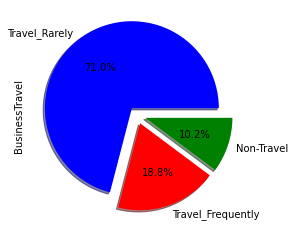

In [29]:
df['BusinessTravel'].value_counts().plot(kind='pie',explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['b','r','g'])
print(df['BusinessTravel'].value_counts())

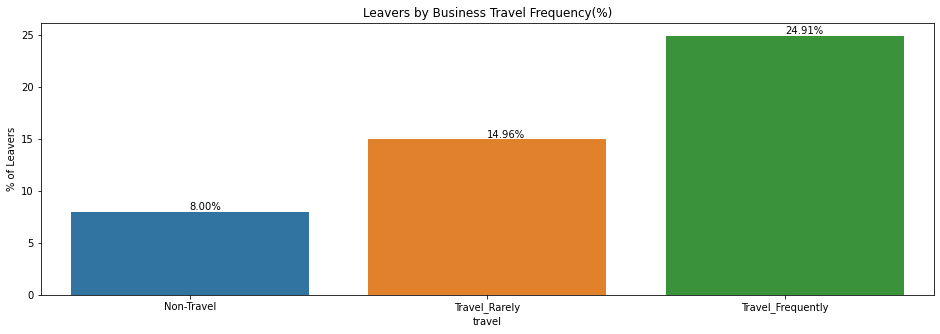

In [30]:
df_travel = pd.DataFrame(columns=["travel", "% of Leavers"])
i=0
for d in list(df['BusinessTravel'].unique()):
    ratio = df[(df['BusinessTravel']==d)&(df['Attrition']==1)].shape[0] / df[df['BusinessTravel']==d].shape[0]
    df_travel.loc[i] = [d, ratio*100]
    i += 1

df_travel.sort_values(by="% of Leavers", ascending=True, inplace=True)

plt.figure(figsize=(16,5))
ax = sns.barplot(x="travel", y="% of Leavers", data=df_travel)
for i, v in enumerate(df_travel["% of Leavers"].iteritems()):  
    ax.text(i,v[1], "{:,.2f}%".format(v[1]), va ='bottom', rotation=0)
plt.title("Leavers by Business Travel Frequency(%)")
plt.show()

##### Job Involvement vs Attrition
1 - 'Low' <br>
2 - 'Medium' <br>
3 - 'High' <br>
4 - 'Very High'

><li> Most of the employees considered their involvement with their jobs as High.</li><li>There is a negative correlation with the Job Involvement of an employee and the Attrition where by employees with higher Job Involvement are less likely to leave.

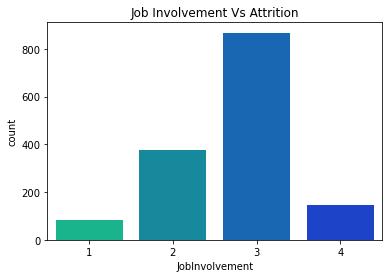

In [31]:
#df['JobInvolvement'] = df['JobInvolvement'].replace([1,2,3,4],['Low','Medium', 'High', 'Very High'])
sns.countplot(x ='JobInvolvement', data = df, palette = 'winter_r')
plt.title('Job Involvement Vs Attrition')
plt.show()

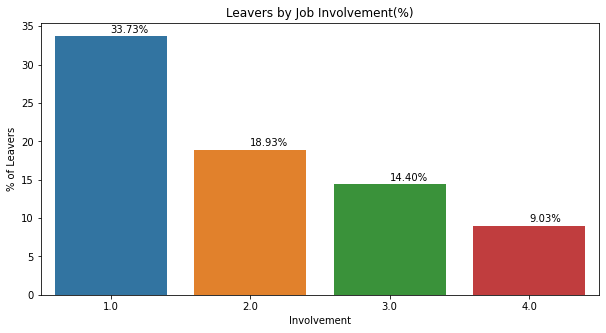

In [32]:
df_JobInvolvement = pd.DataFrame(columns=["Involvement", "% of Leavers"])
i=0
for d in list(df['JobInvolvement'].unique()):
    ratio = df[(df['JobInvolvement']==d)&(df['Attrition']==1)].shape[0] / df[df['JobInvolvement']==d].shape[0]
    df_JobInvolvement.loc[i] = [d, ratio*100]
    i += 1

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Involvement", y="% of Leavers", data=df_JobInvolvement)
for i in range(1,len(df_JobInvolvement)+1):
    text = df_JobInvolvement[df_JobInvolvement["Involvement"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i-1,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Job Involvement(%)")
plt.show()

##### Job Satisfaction, Employee Satisfaction, Relationship Satisfaction
1 - 'Low' <br>
2 - 'Medium' <br>
3 - 'High' <br>
4 - 'Very High'

> <li> For the employees who left the organisation, the Job, Relationship and Environment satisfaction where largely at 1 (Low) </li><li>We can see that low satisfaction has the highest proportion while very high satisfaction has the lowest proportion of Attrition </li>


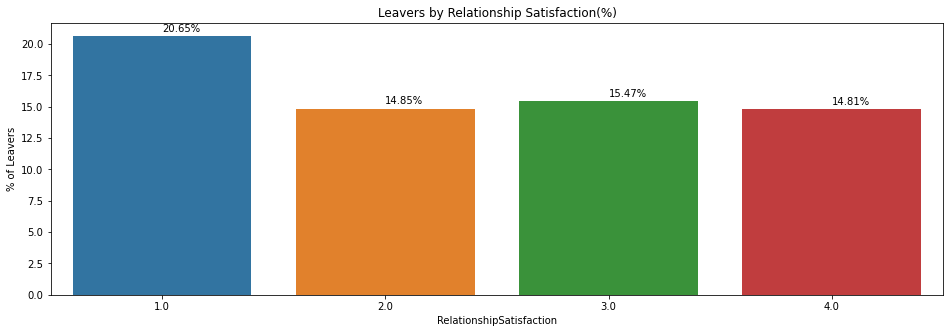

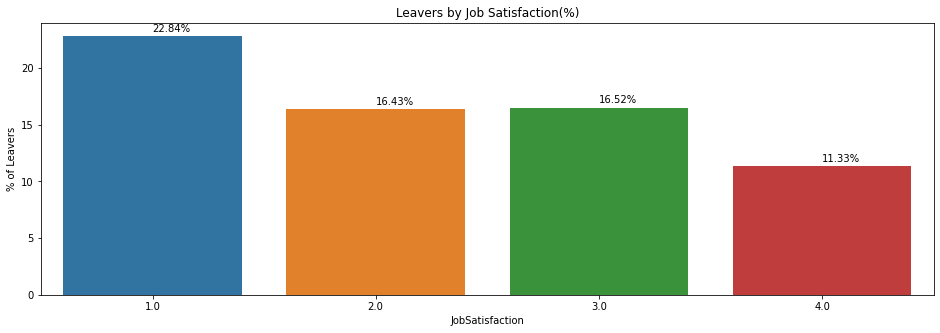

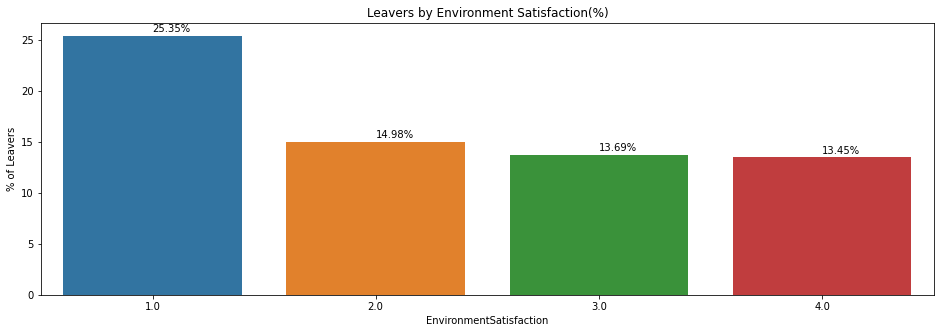

In [33]:
df_rs = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for d in list(df['RelationshipSatisfaction'].unique()):
    ratio = df[(df['RelationshipSatisfaction']==d)&(df['Attrition']==1)].shape[0] / df[df['RelationshipSatisfaction']==d].shape[0]
    df_rs.loc[i] = [d, ratio*100]
    i += 1
    
plt.figure(figsize=(16,5))
ax = sns.barplot(x="RelationshipSatisfaction", y="% of Leavers", data=df_rs)
for i in range(1,len(df_rs)+1):
    text = df_rs[df_rs["RelationshipSatisfaction"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i-1,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Relationship Satisfaction(%)")
plt.show()

#############

df_js = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for d in list(df['JobSatisfaction'].unique()):
    ratio = df[(df['JobSatisfaction']==d)&(df['Attrition']==1)].shape[0] / df[df['JobSatisfaction']==d].shape[0]
    df_js.loc[i] = [d, ratio*100]
    i += 1
    
plt.figure(figsize=(16,5))
ax = sns.barplot(x="JobSatisfaction", y="% of Leavers", data=df_js)
for i in range(1,len(df_js)+1):
    text = df_js[df_js["JobSatisfaction"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i-1,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Job Satisfaction(%)")
plt.show()

#############

df_es = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i=0
for d in list(df['EnvironmentSatisfaction'].unique()):
    ratio = df[(df['EnvironmentSatisfaction']==d)&(df['Attrition']==1)].shape[0] / df[df['EnvironmentSatisfaction']==d].shape[0]
    df_es.loc[i] = [d, ratio*100]
    i += 1
    
plt.figure(figsize=(16,5))
ax = sns.barplot(x="EnvironmentSatisfaction", y="% of Leavers", data=df_es)
for i in range(1,len(df_es)+1):
    text = df_es[df_es["EnvironmentSatisfaction"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i-1,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Environment Satisfaction(%)")
plt.show()

##### Performance Rating vs Attrition
1 - 'Low' <br>
2 - 'Good' <br>
3 - 'Excellent' <br>
4 - 'Outstanding'

> <li> We can see that there is no employee with performance rating below excellent </li><li> <mark>might be able to remove this attribute </mark> </li>

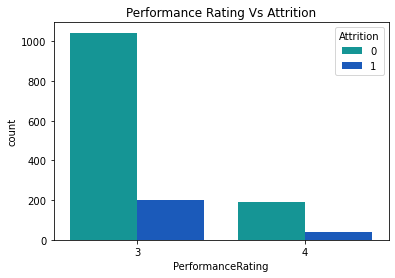

In [34]:
#df['PerformanceRating'] = df['PerformanceRating'].replace([1,2,3,4],['Low','Good', 'Excellent', 'Outstanding'])
sns.countplot(x = 'PerformanceRating', data = df, palette = 'winter_r', hue = 'Attrition')
plt.title('Performance Rating Vs Attrition')
plt.show()

##### Worklife Balance vs Attrition
1 - 'Bad' <br>
2 - 'Good' <br>
3 - 'Better' <br>
4 - 'Best'

>The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.

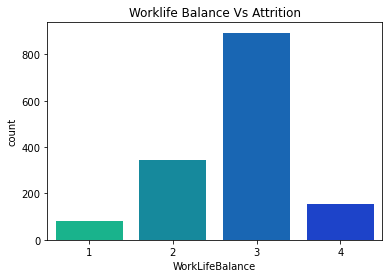

In [35]:
#df['WorkLifeBalance`'] = df['WorkLifeBalance'].replace([1,2,3,4], ['Bad','Good', 'Better', 'Best'])
sns.countplot(x = 'WorkLifeBalance', data = df, palette = 'winter_r')
plt.title('Worklife Balance Vs Attrition')
plt.show()

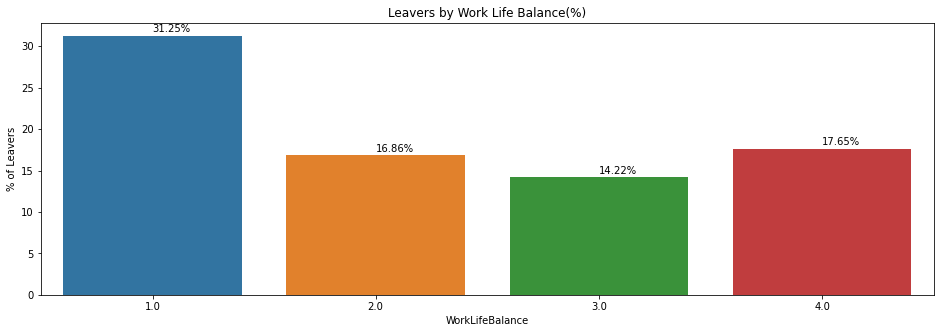

In [36]:
df_wfb = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for d in list(df['WorkLifeBalance'].unique()):
    ratio = df[(df['WorkLifeBalance']==d)&(df['Attrition']==1)].shape[0] / df[df['WorkLifeBalance']==d].shape[0]
    df_wfb.loc[i] = [d, ratio*100]
    i += 1
    
plt.figure(figsize=(16,5))
ax = sns.barplot(x="WorkLifeBalance", y="% of Leavers", data=df_wfb)
for i in range(1,len(df_wfb)+1):
    text = df_wfb[df_wfb["WorkLifeBalance"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i-1,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Work Life Balance(%)")
plt.show()

###### YearsWithCurrManager vs Attrition

>we can see more employees tend to leave with less than 2 years with the current managers and tend to stay if having more than 5 years experience

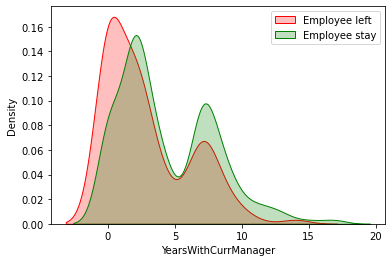

In [37]:
df_left=df[df['Attrition']==1]['YearsWithCurrManager'] 
df_stay=df[df['Attrition']==0]['YearsWithCurrManager'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'r' )
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'g')
plt.legend()
plt.show()

###### TotalWorkingYears, YearsInCurrentRole, YearsAtCompany, TrainingTimesLastYear vs Attrition

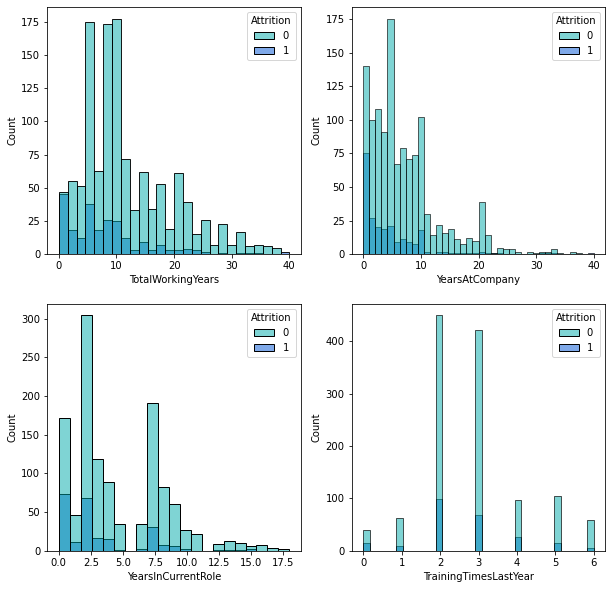

In [38]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x= 'TotalWorkingYears' ,data =df ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,2)
sns.histplot(x= 'YearsAtCompany' ,data =df ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,3)
sns.histplot(x= 'YearsInCurrentRole' ,data =df ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,4)
sns.histplot(x= 'TrainingTimesLastYear' ,data =df ,palette='winter_r',hue='Attrition')
plt.show()

###### YearsSinceLastPromotion

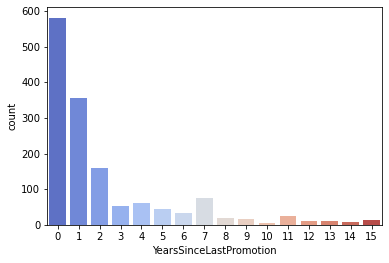

In [39]:
b=sns.countplot(x= 'YearsSinceLastPromotion' ,data = df ,palette='coolwarm'  )
plt.show()

###### NumCompaniesWorked

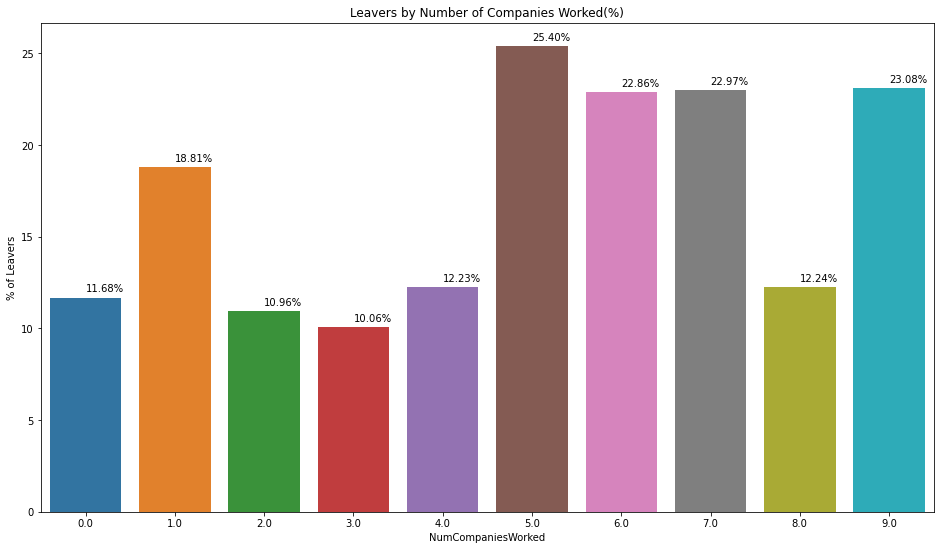

In [40]:
df_ncw = pd.DataFrame(columns=["NumCompaniesWorked", "% of Leavers"])
i=0
for d in list(df['NumCompaniesWorked'].unique()):
    ratio = df[(df['NumCompaniesWorked']==d)&(df['Attrition']==1)].shape[0] / df[df['NumCompaniesWorked']==d].shape[0]
    df_ncw.loc[i] = [d, ratio*100]
    i += 1

plt.figure(figsize=(16,9))
ax = sns.barplot(x="NumCompaniesWorked", y="% of Leavers", data=df_ncw)
for i in range(0,len(df_ncw)):
    text = df_ncw[df_ncw["NumCompaniesWorked"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Number of Companies Worked(%)")
plt.show()

###### Monthly Income vs Attrition

> A large majority of low monthly income tends to leave than the group of high monthly income.

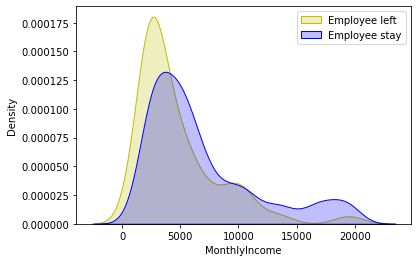

In [41]:
df_left=df[df[ 'Attrition']==1]['MonthlyIncome'] 
df_stay=df[df[ 'Attrition']==0]['MonthlyIncome'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'y' )
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'b')
plt.legend()
plt.show()

###### PercentSalaryHike

> Higher percentage hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a  that of a good hike.

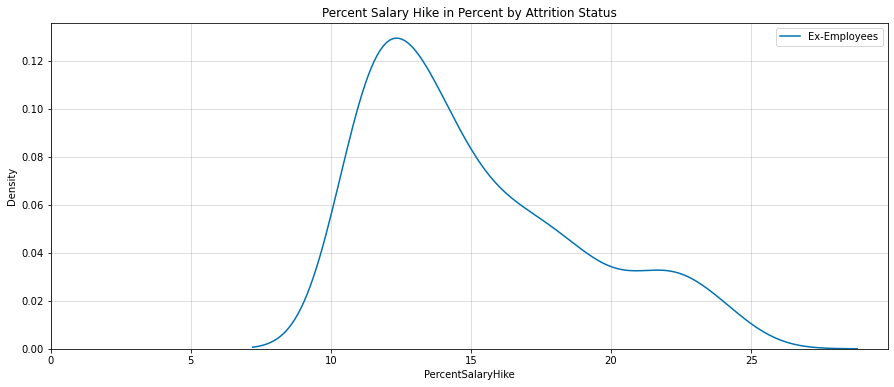

In [42]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
#sns.kdeplot(df.loc[df['Attrition'] == 0, 'PercentSalaryHike'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 1, 'PercentSalaryHike'], label = 'Ex-Employees')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=0)
plt.ylabel('Density')
plt.legend()
plt.title('Percent Salary Hike in Percent by Attrition Status');

###### StockOptionLevel vs Attrition

> The tendency of employees to leave the organization is much more when the stock availing options are limited. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stock options have a freedom to leave the organization at will.

In [43]:
df.loc[df['Attrition'] == 1, 'StockOptionLevel'].value_counts()

0    154
1     56
3     15
2     12
Name: StockOptionLevel, dtype: int64

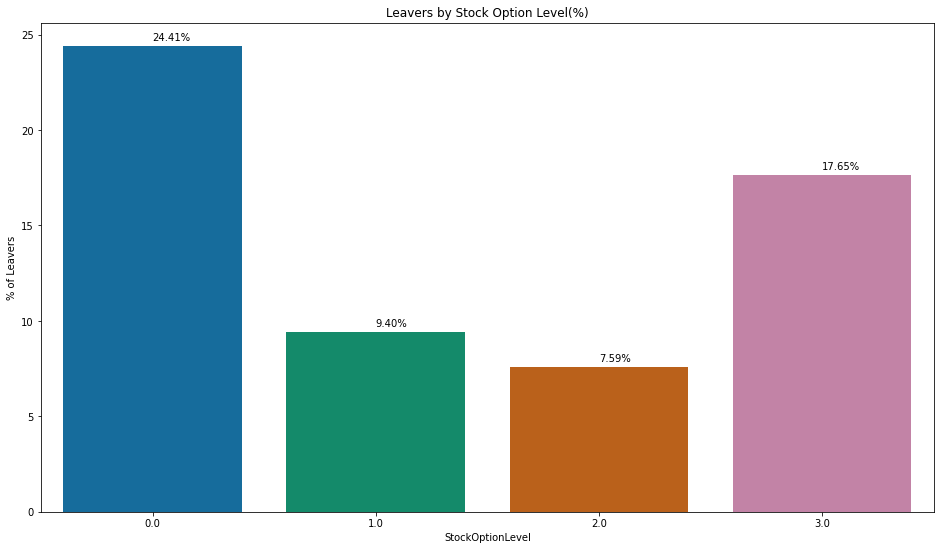

In [44]:
df_sol = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i=0
for d in list(df['StockOptionLevel'].unique()):
    ratio = df[(df['StockOptionLevel']==d)&(df['Attrition']==1)].shape[0] / df[df['StockOptionLevel']==d].shape[0]
    df_sol.loc[i] = [d, ratio*100]
    i += 1

plt.figure(figsize=(16,9))
ax = sns.barplot(x="StockOptionLevel", y="% of Leavers", data=df_sol)
for i in range(0,len(df_sol)):
    text = df_sol[df_sol["StockOptionLevel"] == i]["% of Leavers"].values[0].round(2)
    ax.text(i,text+0.2, "{:,.2f}%".format(text), va ='bottom', rotation=0)

plt.title("Leavers by Stock Option Level(%)")
plt.show()

### Summary from EDA

<mark>About the dataset </mark>
<ul>
    <li>The dataset does not feature any missing, duplicate or erroneous data values, and all features are of the correct data type.</li>
    <li>The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.</li>
    <li>Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.</li>
</ul>

In the literature review by Dr. Shivani on "Review on literacture factors influencing attrition and retention", it is stated that many variables like salary, age, tenure, gender, job satisfaction, availability of suitable opportunities, workplace social support, location, quality of work life, have been studied and they have been found as playing an important role in the increasing or decreasing attrition trend. 

From our EDA findings below, some of these aforementioned factors shows clear result of affecting attrition

<mark>Findings</mark>
<ul>
    <li> <strong>Gender:</strong> Males have a higher rate of attrition. </li>
    <li> <strong>Age:</strong> People are tending to switch to a different jobs at the start of their careers, or at the earlier parts of it. Once they have settled with a family or have found stability in their jobs, they tend to stay long in the same organization- only going for vertical movements in the same organization</li>
    <li><strong>Salary:</strong> A large majority of low monthly income tends to leave than the group of high monthly income.</li>
    <li><strong>Job Role:</strong> Sales Representative tends to leave more other roles because they have lower income compared with other roles.</li>
    <li><strong>NumCompaniesWorked:</strong> Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.</li>
    <li><strong>DistanceFromHome:</strong>More employees tend to leave when the distance from home is more than 10 km.</li>
    <li><strong>Satisfaction:</strong> Employees that are dissatisfied with the environment conditions, relationship and JobSatisfaction tend to leave more compared with other.</li>
    <li><strong>OverTime: </strong>People who have to work overtime show higher proportion of leavers compared to their counterparts.</li>
    <li><strong>Job Involvement: </strong> Employees with higher Job Involvement are less likely to leave.</li>
    <li><strong>Years at Company: </strong>More employees tend to leave with less than 5 years in the company</li>
</ul>

<hr>

### Features Selection and Scaling

###### Dropping columns with constant value and identifier columns

In [45]:
col_to_drop

Index(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], dtype='object')

In [46]:
df.drop(columns=col_to_drop, inplace=True) 

In [47]:
df.shape #35 - 4 = 31 remaining cols 

(1470, 31)

###### Encoding the categorical type data 


In [48]:
le = LabelEncoder()

In [49]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [50]:
# convert rest of categorical variable into dummy
df = pd.get_dummies(df, drop_first=True)

###### Standardisation

In [51]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,1.666667,0.0,4.571429,3.333333,1.25,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,3.333333,5.0,2.214286,1.666667,1.25,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,5.000000,5.0,4.428571,1.666667,0.00,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,5.000000,0.0,1.857143,3.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.000000,5.0,0.714286,3.333333,0.00,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   float32
 2   DailyRate                          1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   float64
 4   Education                          1470 non-null   float64
 5   EnvironmentSatisfaction            1470 non-null   float64
 6   Gender                             1470 non-null   float64
 7   HourlyRate                         1470 non-null   float64
 8   JobInvolvement                     1470 non-null   float64
 9   JobLevel                           1470 non-null   float64
 10  JobSatisfaction                    1470 non-null   float64
 11  MonthlyIncome                      1470 non-null   float

### Handling imbalance data with SMOTE

In [53]:
# Separate input features and target
y = df["Attrition"]
X = df.loc[:, df.columns != 'Attrition']

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


sm = SMOTE(random_state = 0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [54]:
y_train.value_counts()

0.0    913
1.0    913
Name: Attrition, dtype: int64

### Handling imbalance data with GAN

https://realpython.com/generative-adversarial-networks/

In [55]:
# setting up testing and training sets
X_gantrain, X_gantest, y_gantrain, y_gantest = train_test_split(X, y, test_size=0.25, random_state=123)

In [56]:
import torch.nn as nn
import torch

process = X_gantrain.copy()
process['target'] = y_gantrain.copy()

In [57]:
process.target.value_counts()

0.0    913
1.0    189
Name: target, dtype: int64

In [58]:
X_forgenerate = process.query("target == 1").iloc[:,:-1].values
X_forgenerate = torch.tensor(X_forgenerate).type(torch.FloatTensor)

X_non_attrition = process.query('target == 0').iloc[:,:-1].values #without target col
n_generate = X_non_attrition.shape[0] - X_forgenerate.shape[0]

print(f'Have to generate {n_generate} record of attrition = 1 to balance data')

Have to generate 724 record of attrition = 1 to balance data


In [59]:
BATCH_SIZE = 50
LR_G = 0.001           
LR_D = 0.001           
N_IDEAS = 28      # Initial idea for G generator (random inspiration)


G = nn.Sequential(                      # generator
    nn.Linear(N_IDEAS, 128),            
    nn.ReLU(),
    nn.Linear(128, 44), 
)


D = nn.Sequential(                      # discriminator
    nn.Linear(44, 128),     
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

# optimizator
opt_D = torch.optim.Adam(D.parameters(),lr=LR_D)
opt_G = torch.optim.Adam(G.parameters(),lr=LR_G)


In [60]:
loss_function = nn.BCELoss()

In [61]:
# GAN
for step in range(3000):
    # Randomly select real samples of defined batch size with label 1
    chosen_data = np.random.choice((X_forgenerate.shape[0]),size=(BATCH_SIZE),replace=False)
    artist_paintings = X_forgenerate[chosen_data,:]
    
    # Generate fake samples using generators
    G_ideas = torch.randn(BATCH_SIZE, N_IDEAS, requires_grad=True)           
    G_paintings = G(G_ideas)                  
    
    #training the generator
    prob_artist1 = D(G_paintings) 
    
    # loss
    G_loss = torch.mean(torch.log(1. - prob_artist1))
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    

    # Training the discriminator
    prob_artist0 = D(artist_paintings)
    prob_artist1 = D(G_paintings.detach())
    # loss
    D_loss = - torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)
    opt_D.step()

In [62]:
#GAN fake data
fake_data = G(torch.randn(n_generate,N_IDEAS)).detach().numpy()

X_default = pd.DataFrame(np.concatenate([X_forgenerate,fake_data]))
X_default['target'] = 1

X_non_attrition = pd.DataFrame(X_non_attrition)
X_non_attrition['target'] = 0
train_data_gan = pd.concat([X_default,X_non_attrition])

X_gan = train_data_gan.iloc[:,:-1]
y_gan = train_data_gan.iloc[:,-1]

print(X_gan.shape,y_gan.shape)

(1826, 44) (1826,)


### Testing SMOTE and GAN on Baseline Modelling

In [63]:
# set table to table to populate with performance results
col = ['Algorithm','Train Accuracy Mean', 'Test Accuracy', "Test ROC Score"]

def runmodel(X_train, y_train):
    train_acc_results = []
    test_acc_results = []
    names = []
    
    df_results = pd.DataFrame(columns=col)
    
    i = 0
    # evaluate each model using cross-validation
    for name, model in models:
        kfold = KFold(n_splits=10)  # 10-fold cross-validation

        # cv accuracy scoring
        cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        train_acc_results.append(cv_acc_results)

        #test accuracy scoring
        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, pred)
        test_acc_results.append(test_accuracy)

        #roc auc score
        roc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

        names.append(name)
        df_results.loc[i] = [name, round(cv_acc_results.mean()*100, 2), round(test_accuracy*100,2), roc]

        i += 1
        
    return df_results

In [64]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC(probability=True)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Adaboost', AdaBoostClassifier()))
models.append(("Gradientboost", GradientBoostingClassifier()))
models.append(("BaggingClassifier", BaggingClassifier()))
models.append(("ExtremeGradientBoost", XGBClassifier()))
models.append(("ExtraTreesClassifier", ExtraTreesClassifier()))

###### SMOTE

In [65]:
smote_result = runmodel(X_train, y_train)
smote_result.sort_values(by=['Test Accuracy'], ascending=False)

C:\Users\evely\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\evely\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

,Algorithm,Train Accuracy Mean,Test Accuracy,Test ROC Score
7,Gradientboost,91.36,90.76,0.812370
1,Random Forest,94.10,89.95,0.819531
10,ExtraTreesClassifier,96.23,89.40,0.814095
8,BaggingClassifier,89.99,88.04,0.732454
9,ExtremeGradientBoost,92.73,88.04,0.826758
6,Adaboost,89.23,85.33,0.822721
2,SVM,90.59,81.79,0.778060
4,Decision Tree Classifier,84.74,79.08,0.684896
0,Logistic Regression,76.07,74.73,0.829492
3,KNN,79.94,60.60,0.645898


###### GAN

In [66]:
gan_result = runmodel(X_gan, y_gan)
gan_result.sort_values(by=['Test Accuracy'], ascending=False)

C:\Users\evely\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\evely\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

C:\Users\evely\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\evely\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\evely\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
C:\Users\evely\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
C:\Users\evely\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
C:\Users\evely\AppData\Roaming\Python\P

,Algorithm,Train Accuracy Mean,Test Accuracy,Test ROC Score
7,Gradientboost,87.70,91.03,0.845117
2,SVM,88.63,90.76,0.823372
6,Adaboost,86.38,90.76,0.834766
0,Logistic Regression,87.36,89.95,0.830924
1,Random Forest,89.01,89.95,0.841699
9,ExtremeGradientBoost,86.93,88.86,0.821615
10,ExtraTreesClassifier,88.79,88.86,0.824382
8,BaggingClassifier,87.70,88.32,0.761361
3,KNN,87.64,87.23,0.706250
5,Gaussian NB,89.45,86.96,0.596029


## Analysis

> From the result above, we can see a clear underfitting scenario in the case of using GAN to balance data. Furthermore, SMOTE provide a better result in both training and test accuracy. Moving forward, we will be improving on the top 5 models generated from SMOTE datasets through the tuning of hyperparameters and features selection

https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation-28ec3983f077#:~:text=ROC%20Curve%20Intuition,False%20Positive%20Rate%20(FPR).

## Performance

### Functions for code reusability

####  1. Model Evaluation Function

In [67]:
col = ["Accuracy", "Precision", "Recall", "f1", " Auc Roc"]
df_performance = pd.DataFrame(columns=col)

In [68]:
#To evaluate performances of all the models
def performance(name, p, ytest, predict_proba):
    
    accuracy = np.round(accuracy_score(p,ytest),4)
    
    auc = np.round(roc_auc_score(ytest,predict_proba),4)
    
    cm = confusion_matrix(p,ytest)
    tn = cm[0][0]
    fn = cm[1][0]
    fp = cm[0][1]
    tp = cm[1][1]
    precision = round(tp/(tp+fp),4)
    recall = round(tp/(tp+fn),4)
    f1 = round((2*precision*recall)/(precision + recall),4)

    #i = df_results.shape[0]+1
    
    df_performance.loc[name] = [accuracy,precision,recall,f1,auc]

    #print('Classification Report:')
    #print(classification_report(p,ytest))

#### 2. Plot Feature Importance Graph

In [69]:
#https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(16,9))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

## Top 5 Model Tuning

### 1. Gradient Boosting

### 2. ExtraTreesClassifier

### 3. Random Forest

In [73]:
params={
        'n_estimators':[100, 300, 500],
        'criterion':['gini','entropy', "log_loss"],
        'max_depth':[5,6,7,None],
        'max_features':["sqrt", "log2", None]
       }

In [74]:
g=GridSearchCV(RandomForestClassifier(),params,cv=5)

In [75]:
g.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 300, 500]})

In [76]:
print(f'Best Params: {g.best_params_}')
print(f'Best Estimator: {g.best_estimator_}')
print(f'Best Score: {g.best_score_}')

Best Params: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}
Best Estimator: RandomForestClassifier(n_estimators=300)
Best Score: 0.9332809342016619


In [77]:
rf = g.best_estimator_
rf.fit(X_train,y_train)
prediction=rf.predict(X_test)

predict_proba = rf.predict_proba(X_test)[:,1]

In [78]:
performance("Random Forest", prediction, y_test, predict_proba)

In [79]:
df_performance.head()

,Accuracy,Precision,Recall,f1,Auc Roc
Random Forest,0.894,0.3333,0.6957,0.4507,0.8282


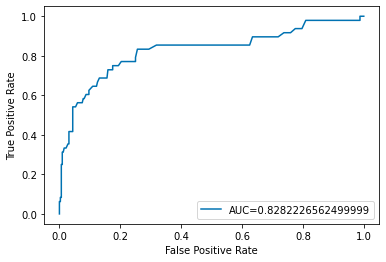

In [80]:
fpr, tpr, _ = roc_curve(y_test,  predict_proba)
auc = roc_auc_score(y_test, predict_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

###### Features Importance

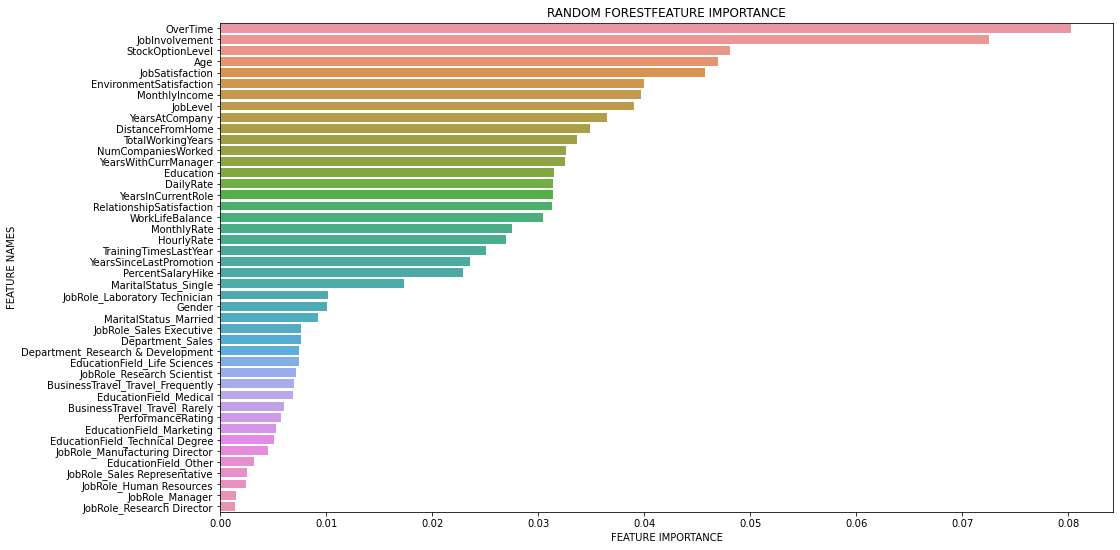

In [81]:
rf_features = rf.feature_importances_
plot_feature_importance(rf_features,X_train.columns,'RANDOM FOREST')

> dropping the last 5 features, did not improve the accuracy of the model

### 4. ExtremeGradientBoost	

### 5. BaggingClassifier	

### Final Evaluation